In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

## Load the Dataset

In [121]:
df = pd.read_csv("credit.csv")

In [122]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


## Exploratory Data Aanalysis

In [124]:
df.isnull().sum()/len(df) * 100

Id                0.000000
Age               0.000000
Income            0.000000
Home              0.000000
Emp_length        2.747000
Intent            0.000000
Amount            0.000000
Rate              9.563856
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64

In [125]:
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [126]:
df.drop(columns = "Id", inplace=True)

In [127]:
df.duplicated().sum()

165

In [128]:
## Remove the duplicated values from the data set 
df.drop_duplicates(inplace=True)

In [129]:
df.duplicated().sum()

0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32416 non-null  int64  
 1   Income          32416 non-null  int64  
 2   Home            32416 non-null  object 
 3   Emp_length      31529 non-null  float64
 4   Intent          32416 non-null  object 
 5   Amount          32416 non-null  int64  
 6   Rate            29321 non-null  float64
 7   Status          32416 non-null  int64  
 8   Percent_income  32416 non-null  float64
 9   Default         32416 non-null  object 
 10  Cred_length     32416 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


In [131]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [132]:
numerical_impute = SimpleImputer(strategy='median')


In [133]:
for col in numerical_columns:
  df[col] = numerical_impute.fit_transform(df[[col]])

In [134]:
df.isnull().sum()/len(df) * 100

Age               0.0
Income            0.0
Home              0.0
Emp_length        0.0
Intent            0.0
Amount            0.0
Rate              0.0
Status            0.0
Percent_income    0.0
Default           0.0
Cred_length       0.0
dtype: float64

In [135]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22.0,59000.0,RENT,123.0,PERSONAL,35000.0,16.02,1.0,0.59,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,1000.0,11.14,0.0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,5500.0,12.87,1.0,0.57,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,35000.0,15.23,1.0,0.53,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,35000.0,14.27,1.0,0.55,Y,4.0


In [136]:
df['Home'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [137]:
df['Home'] = df['Home'].map({ 'RENT' : 0, 'OWN':1, 'MORTGAGE': 2,'OTHER':3 })

In [138]:
df['Intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [139]:
df['Intent'] = df['Intent'].map({ 'PERSONAL' : 0, 'EDUCATION':1, 'MEDICAL': 2, 'VENTURE':3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION':5})

In [140]:
df['Default'] = df['Default'].map({ 'N' : 0, 'Y':1})

In [141]:
df.info()
# All attributes are now in Numerical format

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32416 non-null  float64
 1   Income          32416 non-null  float64
 2   Home            32416 non-null  int64  
 3   Emp_length      32416 non-null  float64
 4   Intent          32416 non-null  int64  
 5   Amount          32416 non-null  float64
 6   Rate            32416 non-null  float64
 7   Status          32416 non-null  float64
 8   Percent_income  32416 non-null  float64
 9   Default         32416 non-null  int64  
 10  Cred_length     32416 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.0 MB


In [142]:
integer = ["Age", "Income","Emp_length", "Intent","Amount","Status","Cred_length"]

In [143]:
df[integer] = df[integer].astype('int64')

In [144]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,0,123,0,35000,16.02,1,0.59,1,3
1,21,9600,1,5,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8,2,35000,14.27,1,0.55,1,4


## Building Predictive Model 

In [145]:
X = df.drop(columns=['Default'])
y = df['Default']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [147]:
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

In [148]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [149]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[5007  366]
 [ 777  334]]
ROC AUC Score: 0.86
accuracy : 82.0 %


<Axes: >

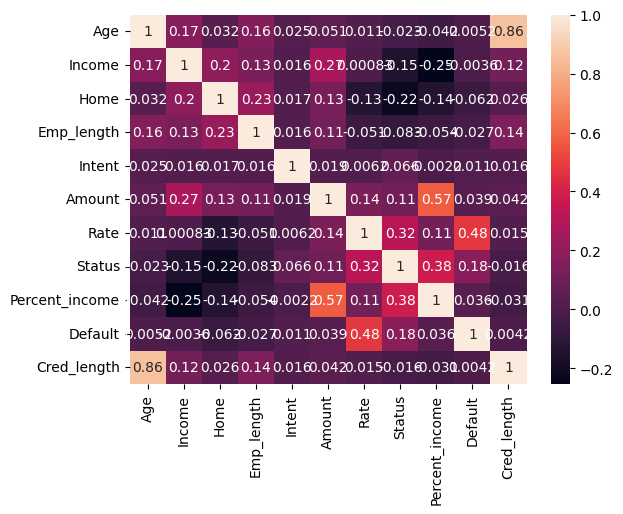

In [150]:
sns.heatmap(df.corr(), annot=True)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
model = LogisticRegression(max_iter=15000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [156]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [157]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[5018  314]
 [ 828  324]]
ROC AUC Score: 0.87
accuracy : 82.0 %


## Random forest 

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 2000, random_state = 42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000, random_state=42)

In [79]:
y_pred = rf_model.predict(X_test)

In [80]:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[4869  463]
 [ 675  477]]
ROC AUC Score: 0.88
accuracy : 82.0 %


## XGB0OST

In [170]:
import xgboost as xgb
xgb_model_ = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state = 42)
xgb_model_.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [171]:
y_pred =xgb_model_.predict(X_test)
y_pred_prob = xgb_model_.predict_proba(X_test)[:, 1]

In [172]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[4838  494]
 [ 630  522]]
ROC AUC Score: 0.89
accuracy : 83.0 %


In [162]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', random_state=42)
svm_model.fit(X_train, y_train) 

SVC(random_state=42)

In [164]:
y_pred = svm_model.predict(X_test)


In [165]:
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[5332    0]
 [1152    0]]
ROC AUC Score: 0.89
accuracy : 82.0 %


# Improving Model

In [92]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,0,123,0,35000,16.02,1,0.59,1,3
1,21,9600,1,5,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8,2,35000,14.27,1,0.55,1,4


In [93]:
df2 = df.copy()

In [94]:
df2

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,0,123,0,35000,16.02,1,0.59,1,3
1,21,9600,1,5,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1,0,5800,13.16,0,0.11,0,30
32577,54,120000,2,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,0,3,4,35000,10.99,1,0.46,0,28
32579,56,150000,2,5,0,15000,11.48,0,0.10,0,26


In [96]:
df2.drop(columns = ["Home","Emp_length","Intent", "Cred_length"], inplace=True)

In [97]:
df2.head()

,Age,Income,Amount,Rate,Status,Percent_income,Default
0,22,59000,35000,16.02,1,0.59,1
1,21,9600,1000,11.14,0,0.10,0
2,25,9600,5500,12.87,1,0.57,0
3,23,65500,35000,15.23,1,0.53,0
4,24,54400,35000,14.27,1,0.55,1


In [98]:
P = df.drop(columns=['Default'])
q = df['Default']

In [99]:
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size=0.2, random_state=42)

In [103]:
model = LogisticRegression(max_iter=2000)
model.fit(P_train, q_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [104]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[5019  313]
 [ 815  337]]
ROC AUC Score: 0.87
accuracy : 83.0 %


## XG Boost

In [106]:

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state = 42)
xgb_model.fit(P_train, q_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [107]:
y_pred =xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [108]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[4838  494]
 [ 630  522]]
ROC AUC Score: 0.89
accuracy : 83.0 %


# second Improvement

In [110]:
df2.head()

,Age,Income,Amount,Rate,Status,Percent_income,Default
0,22,59000,35000,16.02,1,0.59,1
1,21,9600,1000,11.14,0,0.10,0
2,25,9600,5500,12.87,1,0.57,0
3,23,65500,35000,15.23,1,0.53,0
4,24,54400,35000,14.27,1,0.55,1


In [111]:
df2.drop(columns = ["Percent_income","Income"], inplace=True)

In [ ]:
P = df.drop(columns=['Default'])
q = df['Default']

In [112]:
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size=0.2, random_state=42)

In [113]:
model = LogisticRegression(max_iter=2000)
model.fit(P_train, q_train)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [114]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[5019  313]
 [ 815  337]]
ROC AUC Score: 0.87
accuracy : 83.0 %


In [116]:

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state = 42)
xgb_model.fit(P_train, q_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [117]:
y_pred =xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

In [118]:
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("accuracy : " + str(round(accuracy,2) * 100) + " %")

Confusion Matrix:
 [[4838  494]
 [ 630  522]]
ROC AUC Score: 0.89
accuracy : 83.0 %


In [173]:
import pickle
#pickle.dump(df,open("df.pkl","wb"))
#pickle.dump(model,open('model.pkl','wb'))
pickle_out = open("xgb_model_.pkl", "wb")
pickle.dump(model,pickle_out)
pickle_out.close()